In [ ]:
pip install darts

In [ ]:
import pandas as pd
import os
import csv
year = "2010"
path = f"C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS_Processed/gldas_processed_{year}"
path_big = f"C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_{year}/"
files = os.listdir(path_big)
csv_files = [file for file in files if file.endswith('.csv')]
if csv_files:
    # Get the first CSV file
    first_csv_file = csv_files[0]
    print(first_csv_file)
    # Load the first CSV file into a pandas DataFrame
    data = pd.read_csv(os.path.join(path_big, first_csv_file), encoding='latin-1')

    # Display the loaded data
    print(data.columns)
else:
    print("No CSV files found in the folder.")
columns_to_extract = ['Unnamed: 0', 'lon', 'lat'] + [col for col in data.columns if col.startswith('GWS')]
df_combined = data[columns_to_extract]

for file_name in os.listdir(path_big):
    if file_name.endswith('.csv') and file_name != first_csv_file:
        file_path = os.path.join(path_big, file_name)
        df = pd.read_csv(file_path)

        # Extract the columns that start with 'TWS' or 'GWS'
        columns_to_bind = [col for col in df.columns if col.startswith('GWS')]

        # Merge the DataFrame with the previously created DataFrame based on 'lon' and 'lat'
        df_combined = pd.merge(df_combined, df[['lon', 'lat'] + columns_to_bind], on=['lon', 'lat'], how='outer')

In [ ]:
def process_files_in_path(path, df_combined):

    for file_name in os.listdir(path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(path, file_name)
            df = pd.read_csv(file_path)

            # Extract the columns that start with 'TWS' or 'GWS'
            columns_to_bind = [col for col in df.columns if col.startswith('TWS')]

            # Merge the DataFrame with the previously created DataFrame based on 'lon' and 'lat'
            df_combined = pd.merge(df_combined, df[['lon', 'lat'] + columns_to_bind], on=['lon', 'lat'], how='outer')

    return df_combined

# Define multiple paths
paths = ['C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2011/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2012/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2013/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2014/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2015/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2016/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2017/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2018/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2019/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2020/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2021/',
         'C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/GLDAS/csv_2022/']  # Add as many paths as needed

# Process files in each path
for path in paths:
    df_combined = process_files_in_path(path,df_combined)

In [ ]:
new_column_names = []
for col in df_combined.columns:
    if df_combined.columns.get_loc(col) >= 3:  # Check if the column is the 3rd or onward
        new_col_name = col[9:]
    else:
        new_col_name = col  # Leave the first 2 columns unchanged
    new_column_names.append(new_col_name)

# Assign the new column names to the DataFrame
df_combined.columns = new_column_names
print(df_combined.head(2))

In [ ]:
df_combined.drop(df_combined.columns[[1, 2]], axis=1, inplace=True) #delete the lon and lat columns
df_combined = df_combined.T #transpose the dataframe
df_combined.columns = df_combined.iloc[0] #make the column names the id row
df_combined = df_combined[1:] #delete the id row
df_combined.index = pd.to_datetime(df_combined.index, format='%Y%m%d') #make the date index from the first column
df_combined.index.name = 'Date'# name the date index
print(df_combined.head(2))

In [ ]:
#save the csv for future use
df_combined.to_csv('C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/all_GWS.csv', index=True)

In [15]:
import pandas as pd
df_combined = pd.read_csv('C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/data/all_GWS.csv', parse_dates=["Date"], index_col='Date')

In [ ]:
print(df_combined.head(2))

In [ ]:
print(df_num.shape)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

forecast_start = '2022-01-01'
forecast_end = '2024-12-31'

# Select a random subset of 10 places for demonstration
df_combined = df_combined.asfreq('D')
places_to_analyze = np.random.choice(df_combined.columns, size=1, replace=False)

for place in places_to_analyze:
    # Fit SARIMA model
    model = SARIMAX(df_combined[place], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast = results.get_prediction(start=pd.to_datetime(forecast_start), end=pd.to_datetime(forecast_end), dynamic=False)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Plot data and fitted values
    plt.figure(figsize=(10, 6))
    plt.plot(df_combined.index, df_combined[place], label='Original Data')
    plt.plot(df_combined.index, results.fittedvalues, label='Fitted Values', color='red')
    plt.plot(forecast_values.index, forecast_values, label='Forecasted Values', color='green')
    plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)
    plt.title(f'SARIMA Model for {place}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

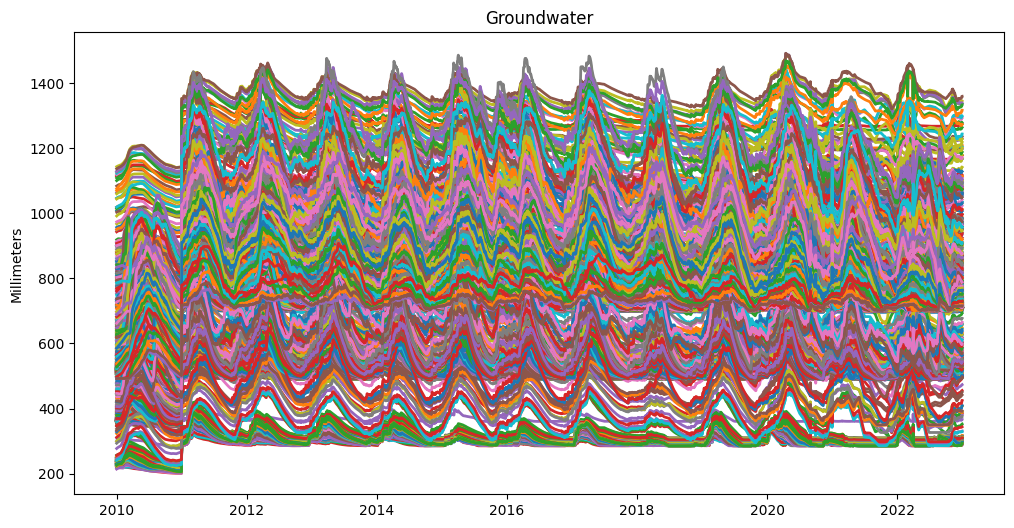

In [21]:
#trying this for a semi-auto approach: https://tsanggeorge.medium.com/a-semi-auto-way-to-determine-parameters-for-sarima-model-74cdee853080
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_combined, label='Groundwater', linewidth=2)
ax.set_title('Groundwater')
ax.set_ylabel('Millimeters')
#ax.legend()
plt.savefig('C:/Users/asobc/Harris-Public-Policy Dropbox/Alex Sobczynski/WorldBank_AFG_Climate/output/groundwater/all_line_plot.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
from statsmodels.tsa.seasonal import STL

cell = np.random.choice(df_combined.columns, size=1, replace=False)
result = STL(endog=cell, period=12, seasonal=13, robust=True).fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(15,10))
axs[0].plot(cell)
axs[0].set_title('Original')
axs[1].plot(seasonal)
axs[1].set_title('Seasonal')
axs[2].plot(trend)
axs[2].set_title('Trend')
axs[3].plot(resid)
axs[3].set_title('Residual')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima
pmdarima.arima.auto_arima(df_num.T)